# 5CSO37 Final Project

***Tasks: Linear Regression and Logistic Regression***

#LINEAR REGRESSION TASK

#### Exploratory Data Analysis and Data Understanding
In this section, we will explore the dataset to understand the relationships between different features and the target variable (Crop tield). We will use various visualizations to gain insights into the data.

- Dataset Name: Crop Yield.csv
- Source: https://www.kaggle.com/datasets/abdullah0a/crop-yield
- Attributes: ID	Year	State	Crop_Type	Rainfall (mm)	Soil_Type	Irrigation_Area (ha),
- target: Crop_Yield (kg/ha)
- Sustainable Development Goals:
    - SDG 2: Zero Hunger: The dataset tracks crop yield, which is crucial for food security.
    - SDG 6: Clean Water and Sanitation: Rainfall and irrigation data relate to water management and sustainable agriculture.
    - SDG 13: Climate Actions: Rainfall variability and crop yield data can help analyze climate impacts on agriculture.

This data can be used for agricultural analysis, climate impact assessment, and sustainable farming research.

##### Initial Inspection:

**Rows:** 10000

**Columns:** 8

**Columns Details:**
1. **ID**: A unique identifier for each record (Integer).
2. **Year**: The year when the data was recorded (Integer).
3. **State**: The state where the crop was grown (Categorical).
4. **Crop_Type**: The type of crop grown (Categorical).
5. **Rainfall (mm)**: The annual rainfall in millimeters (Integer).
6. **Soil_Type**: The type of soil in the farming region (Categorical).
7. **Irrigation_Area (ha)**: The area under irrigation, measured in hectares (Integer).
8. **Crop_Yield (kg/ha)**: The yield of the crop per hectare, in kilograms (Integer).

Goal: Predict crop yield based on provided features.

**Read the csv file from the google drive**

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/CropProduction/crop_data.csv")
data

,ID,Year,State,Crop_Type,Rainfall (mm),Soil_Type,Irrigation_Area (ha),Crop_Yield (kg/ha)
0,1,2006,Punjab,Bajra,300,Loamy,90,2863
1,2,2005,Punjab,Wheat,405,Loamy,104,3132
2,3,2008,Punjab,Wheat,538,Loamy,147,3992
3,4,2018,Punjab,Rice,943,Loamy,107,3067
4,5,2012,Punjab,Rice,977,Loamy,169,3222
...,...,...,...,...,...,...,...,...
9995,9996,2002,Punjab,Rice,973,Alluvial,133,2577
9996,9997,2014,Punjab,Wheat,510,Loamy,142,3836
9997,9998,2015,Punjab,Wheat,557,Loamy,152,3120
9998,9999,2003,Punjab,Wheat,540,Alluvial,113,3087


**Gives the information of top most five rows in default**

In [ ]:
data.head()

,ID,Year,State,Crop_Type,Rainfall (mm),Soil_Type,Irrigation_Area (ha),Crop_Yield (kg/ha)
0,1,2006,Punjab,Bajra,300,Loamy,90,2863
1,2,2005,Punjab,Wheat,405,Loamy,104,3132
2,3,2008,Punjab,Wheat,538,Loamy,147,3992
3,4,2018,Punjab,Rice,943,Loamy,107,3067
4,5,2012,Punjab,Rice,977,Loamy,169,3222


**Gives the information of last five rows in default**

In [ ]:
data.tail()

,ID,Year,State,Crop_Type,Rainfall (mm),Soil_Type,Irrigation_Area (ha),Crop_Yield (kg/ha)
9995,9996,2002,Punjab,Rice,973,Alluvial,133,2577
9996,9997,2014,Punjab,Wheat,510,Loamy,142,3836
9997,9998,2015,Punjab,Wheat,557,Loamy,152,3120
9998,9999,2003,Punjab,Wheat,540,Alluvial,113,3087
9999,10000,2001,Punjab,Rice,945,Alluvial,126,3045


**gives the total no of rows and column. hera are total 10000 rows and 8 columns**

In [ ]:
data.shape

(10000, 8)

# Display dataset information
data.info()

# Explanation:
"""
The dataset has 10,000 records (rows) with 8 columns. Here's a brief description:

1. **ID**: A unique identifier for each record (Integer).
2. **Year**: The year when the data was recorded (Integer).
3. **State**: The state where the crop was grown (Categorical).
4. **Crop_Type**: The type of crop grown (Categorical).
5. **Rainfall (mm)**: The annual rainfall in millimeters (Integer).
6. **Soil_Type**: The type of soil in the farming region (Categorical).
7. **Irrigation_Area (ha)**: The area under irrigation, measured in hectares (Integer).
8. **Crop_Yield (kg/ha)**: The yield of the crop per hectare, in kilograms (Integer).

### Key Points:
- There are no missing values in any columns, as all of them are non-null.
- The dataset combines **numerical** and **categorical** data, ready for preprocessing and modeling.
"""


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10000 non-null  int64 
 1   Year                  10000 non-null  int64 
 2   State                 10000 non-null  object
 3   Crop_Type             10000 non-null  object
 4   Rainfall (mm)         10000 non-null  int64 
 5   Soil_Type             10000 non-null  object
 6   Irrigation_Area (ha)  10000 non-null  int64 
 7   Crop_Yield (kg/ha)    10000 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 625.1+ KB


In [ ]:
data.describe()

,ID,Year,Rainfall (mm),Irrigation_Area (ha),Crop_Yield (kg/ha)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2010.066800,634.147500,118.797700,2971.117200
std,2886.89568,6.045642,207.860707,36.930374,495.509171
min,1.00000,2000.000000,300.000000,50.000000,1800.000000
25%,2500.75000,2005.000000,464.000000,89.000000,2634.000000
50%,5000.50000,2010.000000,576.000000,120.000000,3000.000000
75%,7500.25000,2015.000000,850.000000,151.000000,3326.000000
max,10000.00000,2020.000000,1000.000000,180.000000,4000.000000


# Displaying a summary of the dataset description.

description_text = """
- **ID**: The ID ranges from 1 to 10,000, with a mean value of 5000.5, which is just an identifier for each entry.
- **Year**: The dataset spans from 2000 to 2020, with a mean year of 2010. The data appears to be evenly distributed over the years.
- **Rainfall (mm)**: Rainfall values range from 300 mm to 1000 mm, with a mean of 634.15 mm. This indicates the varying rainfall conditions across regions.
- **Irrigation Area (ha)**: Irrigation area ranges from 50 ha to 180 ha, with a mean of 118.8 ha. This shows different sizes of irrigation across farms.
- **Crop Yield (kg/ha)**: Crop yield ranges from 1800 kg/ha to 4000 kg/ha, with an average yield of 2971.12 kg/ha, showing the productivity across the dataset.
"""


In [ ]:
data.dtypes

,0
ID,int64
Year,int64
State,object
Crop_Type,object
Rainfall (mm),int64
Soil_Type,object
Irrigation_Area (ha),int64
Crop_Yield (kg/ha),int64


# Short explanation of the data types

data_types_explanation = """
- **ID**: Integer (int64), unique identifier.
- **Year**: Integer (int64), year of data.
- **State**: Object (string), state name or identifier.
- **Crop_Type**: Object (string), type of crop.
- **Rainfall (mm)**: Integer (int64), annual rainfall in mm.
- **Soil_Type**: Object (string), type of soil.
- **Irrigation_Area (ha)**: Integer (int64), irrigated area in hectares.
- **Crop_Yield (kg/ha)**: Integer (int64), crop yield in kg/ha.
"""


In [ ]:
null_count = data.isna().sum()
null_count

,0
ID,0
Year,0
State,0
Crop_Type,0
Rainfall (mm),0
Soil_Type,0
Irrigation_Area (ha),0
Crop_Yield (kg/ha),0


# Short explanation of missing values

missing_values_explanation = """
- **ID**: No missing values (0).
- **Year**: No missing values (0).
- **State**: No missing values (0).
- **Crop_Type**: No missing values (0).
- **Rainfall (mm)**: No missing values (0).
- **Soil_Type**: No missing values (0).
- **Irrigation_Area (ha)**: No missing values (0).
- **Crop_Yield (kg/ha)**: No missing values (0).
"""


### Code Explanation:
1. **`check_soil` function**: This function takes a `Soil_Type` as input and checks its value:
    - If the soil type is `'Loamy'`, it returns `0`.
    - If the soil type is `'Alluvial'`, it returns `1`.

2. **`apply` function**: The `check_soil` function is applied to the `Soil_Type` column of the dataframe using the `.apply()` method. This creates a new column `soil_classification` in the dataframe.

3. **Result**: The new `soil_classification` column contains `0` for 'Loamy' soil and `1` for 'Alluvial' soil, which can be used for further analysis or modeling.


In [ ]:
def check_soil(	Soil_Type):
  if(	Soil_Type=='Loamy'):
    return 0
  elif(Soil_Type=='Alluvial'):
    return 1

data['soil_classification'] = data['Soil_Type'].apply(check_soil)
data

,ID,Year,State,Crop_Type,Rainfall (mm),Soil_Type,Irrigation_Area (ha),Crop_Yield (kg/ha),soil_classification
0,1,2006,Punjab,Bajra,300,Loamy,90,2863,0
1,2,2005,Punjab,Wheat,405,Loamy,104,3132,0
2,3,2008,Punjab,Wheat,538,Loamy,147,3992,0
3,4,2018,Punjab,Rice,943,Loamy,107,3067,0
4,5,2012,Punjab,Rice,977,Loamy,169,3222,0
...,...,...,...,...,...,...,...,...,...
9995,9996,2002,Punjab,Rice,973,Alluvial,133,2577,1
9996,9997,2014,Punjab,Wheat,510,Loamy,142,3836,0
9997,9998,2015,Punjab,Wheat,557,Loamy,152,3120,0
9998,9999,2003,Punjab,Wheat,540,Alluvial,113,3087,1


### Code Explanation:
1. **`check_crop` function**: This function takes a `Crop_Type` as input and checks its value:
    - If the crop type is `'Bajra'`, it returns `0`.
    - If the crop type is `'Wheat'`, it returns `1`.
    - If the crop type is neither `'Bajra'` nor `'Wheat'`, it returns `2` (this is a fallback for other crop types).

2. **`apply` function**: The `check_crop` function is applied to the `Crop_Type` column of the dataframe using the `.apply()` method. This creates a new column `crop_classification` in the dataframe.

3. **Result**: The new `crop_classification` column contains:
    - `0` for 'Bajra',
    - `1` for 'Wheat', and
    - `2` for all other crops, which can be used for further analysis or modeling.


In [ ]:
def check_crop(Crop_Type):
  if(	Crop_Type=='Bajra'):
    return 0
  elif(Crop_Type=='Wheat'):
    return 1
  else:
    return 2

data['crop_classification'] = data['Crop_Type'].apply(check_crop)
data

,ID,Year,State,Crop_Type,Rainfall (mm),Soil_Type,Irrigation_Area (ha),Crop_Yield (kg/ha),soil_classification,crop_classification
0,1,2006,Punjab,Bajra,300,Loamy,90,2863,0,0
1,2,2005,Punjab,Wheat,405,Loamy,104,3132,0,1
2,3,2008,Punjab,Wheat,538,Loamy,147,3992,0,1
3,4,2018,Punjab,Rice,943,Loamy,107,3067,0,2
4,5,2012,Punjab,Rice,977,Loamy,169,3222,0,2
...,...,...,...,...,...,...,...,...,...,...
9995,9996,2002,Punjab,Rice,973,Alluvial,133,2577,1,2
9996,9997,2014,Punjab,Wheat,510,Loamy,142,3836,0,1
9997,9998,2015,Punjab,Wheat,557,Loamy,152,3120,0,1
9998,9999,2003,Punjab,Wheat,540,Alluvial,113,3087,1,1


In [ ]:
data

,ID,Year,State,Crop_Type,Rainfall (mm),Soil_Type,Irrigation_Area (ha),Crop_Yield (kg/ha),soil_classification,crop_classification
0,1,2006,Punjab,Bajra,300,Loamy,90,2863,0,0
1,2,2005,Punjab,Wheat,405,Loamy,104,3132,0,1
2,3,2008,Punjab,Wheat,538,Loamy,147,3992,0,1
3,4,2018,Punjab,Rice,943,Loamy,107,3067,0,2
4,5,2012,Punjab,Rice,977,Loamy,169,3222,0,2
...,...,...,...,...,...,...,...,...,...,...
9995,9996,2002,Punjab,Rice,973,Alluvial,133,2577,1,2
9996,9997,2014,Punjab,Wheat,510,Loamy,142,3836,0,1
9997,9998,2015,Punjab,Wheat,557,Loamy,152,3120,0,1
9998,9999,2003,Punjab,Wheat,540,Alluvial,113,3087,1,1


In [ ]:
print(data.columns)

Index(['ID', 'Year', 'State', 'Crop_Type', 'Rainfall (mm)', 'Soil_Type',
       'Irrigation_Area (ha)', 'Crop_Yield (kg/ha)', 'soil_classification',
       'crop_classification'],
      dtype='object')


In [ ]:
correlation_Rainfall = data['Crop_Yield (kg/ha)'].corr(data['Rainfall (mm)'], method='pearson')
correlation_Rainfall

0.27753481365067806

### Result:
- **Correlation Coefficient = 0.2775**:
  - This value indicates a **weak positive correlation** between **Crop Yield** and **Rainfall**.
  - As rainfall increases, crop yield tends to increase slightly, but the relationship is not strong. This suggests that other factors might also play significant roles in determining crop yield

In [ ]:
correlation = data['Crop_Yield (kg/ha)'].corr(data['Irrigation_Area (ha)'], method='pearson')
correlation

0.6186021724884065

### Result:
- **Correlation Coefficient = 0.6186**:
  - This value indicates a **moderate positive correlation** between **Crop Yield** and **Irrigation Area**.
  - As the area under irrigation increases, crop yield tends to increase as well, suggesting that irrigation has a moderate positive impact on crop yield.

In [ ]:
correlation = data['Crop_Yield (kg/ha)'].corr(data['crop_classification'], method='pearson')
correlation

0.5146699047853166

### Result:
- **Correlation Coefficient = 0.5147**:
  - This indicates a **moderate positive correlation** between **Crop Yield** and **Crop Classification**.
  - A positive value suggests that the type of crop is somewhat related to the crop yield, with certain crop types possibly leading to higher yields than others. However, the correlation is not very strong, indicating other factors also influence crop yield.

In [ ]:
correlation = data['Crop_Yield (kg/ha)'].corr(data['soil_classification'], method='pearson')
correlation

-0.30477035192960955

### Result:
- **Correlation Coefficient = -0.3048**:
  - This indicates a **moderate negative correlation** between **Crop Yield** and **Soil Classification**.
  - A negative value suggests that as the soil classification changes (from Loamy to Alluvial), there might be a decrease in crop yield. However, the correlation is moderate, indicating other factors are also at play in determining crop yield.

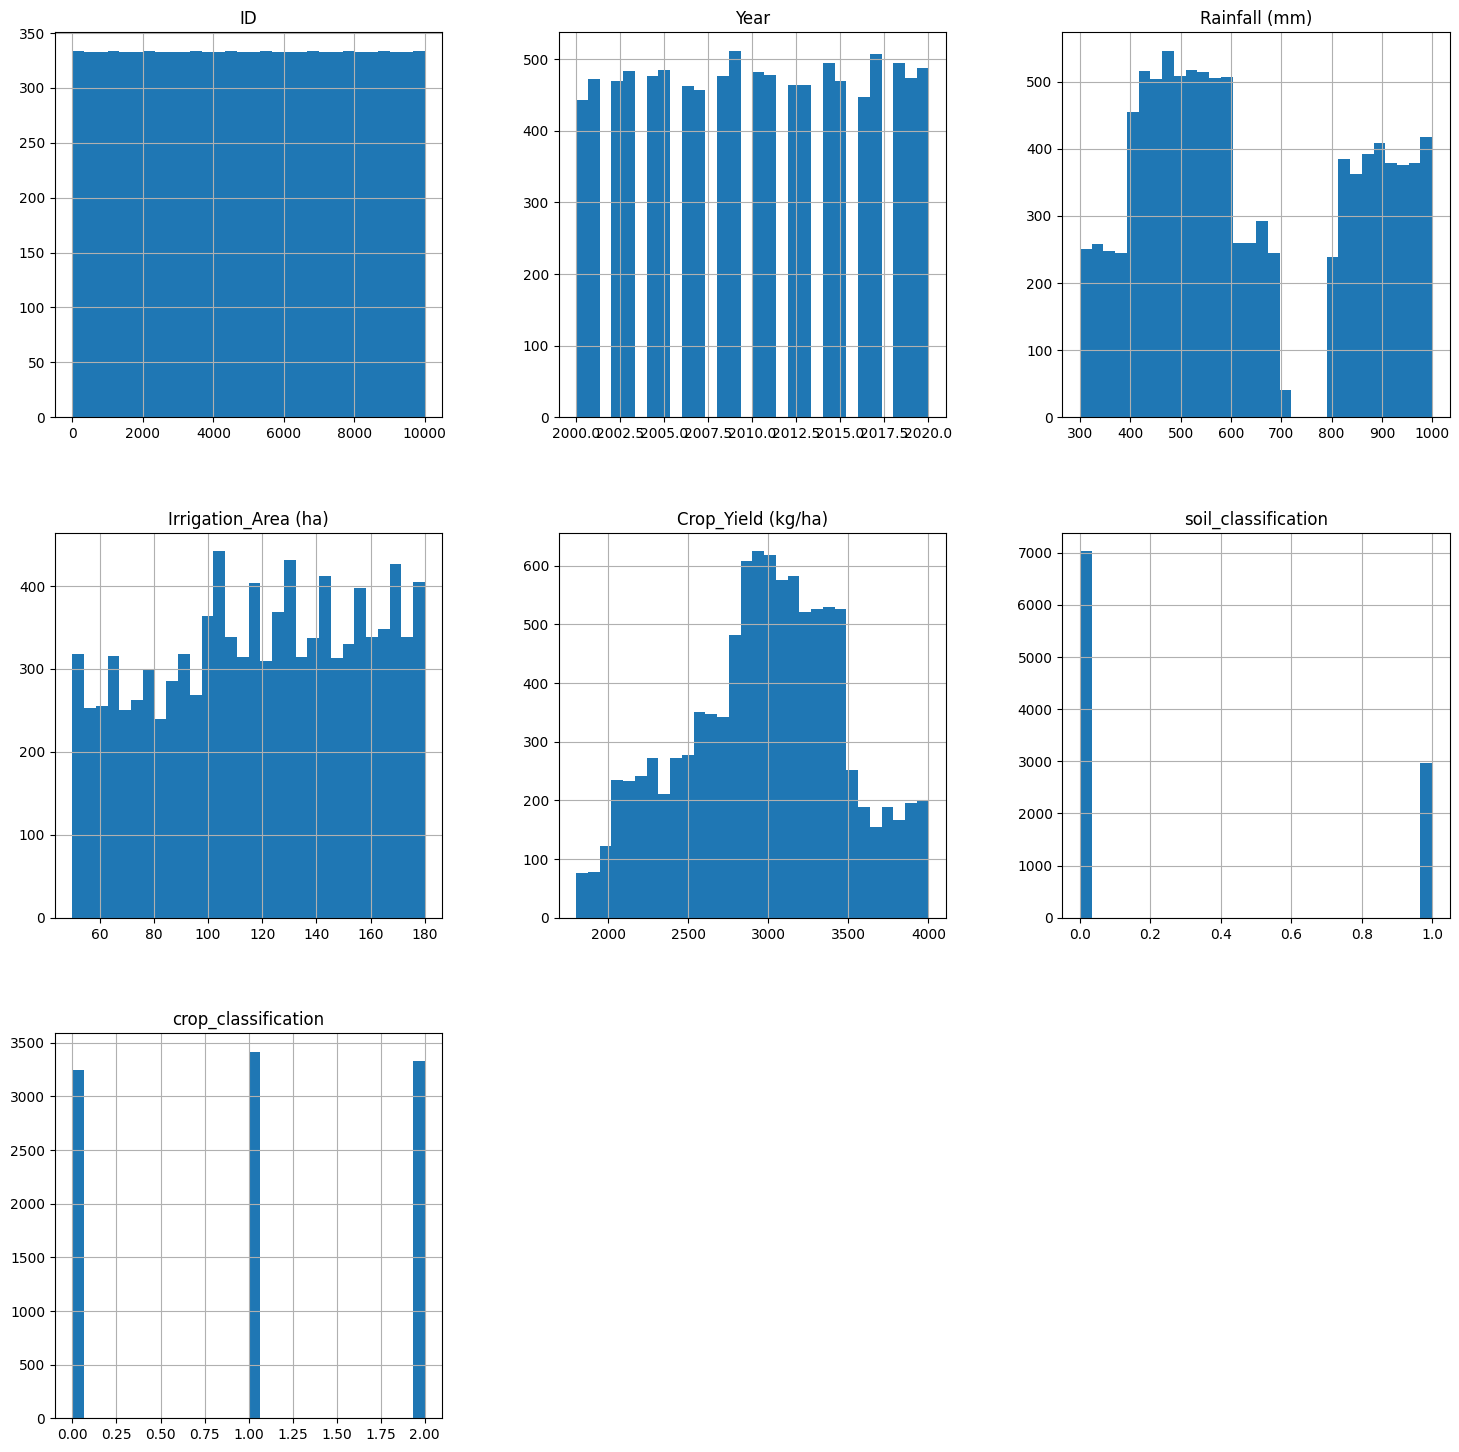

In [ ]:
numerical_df = data.select_dtypes(include=np.number)
# Plot histograms for all columns
numerical_df.hist(bins=30, figsize=(18, 18))
plt.show()

Above histogram represent the graph of all continuous (numerical) columns of data frame. It help to understand how the values are spread, identifies if data are normally distributed or not. Due to the large amount of data we cannot visualize the bins of hisyogram

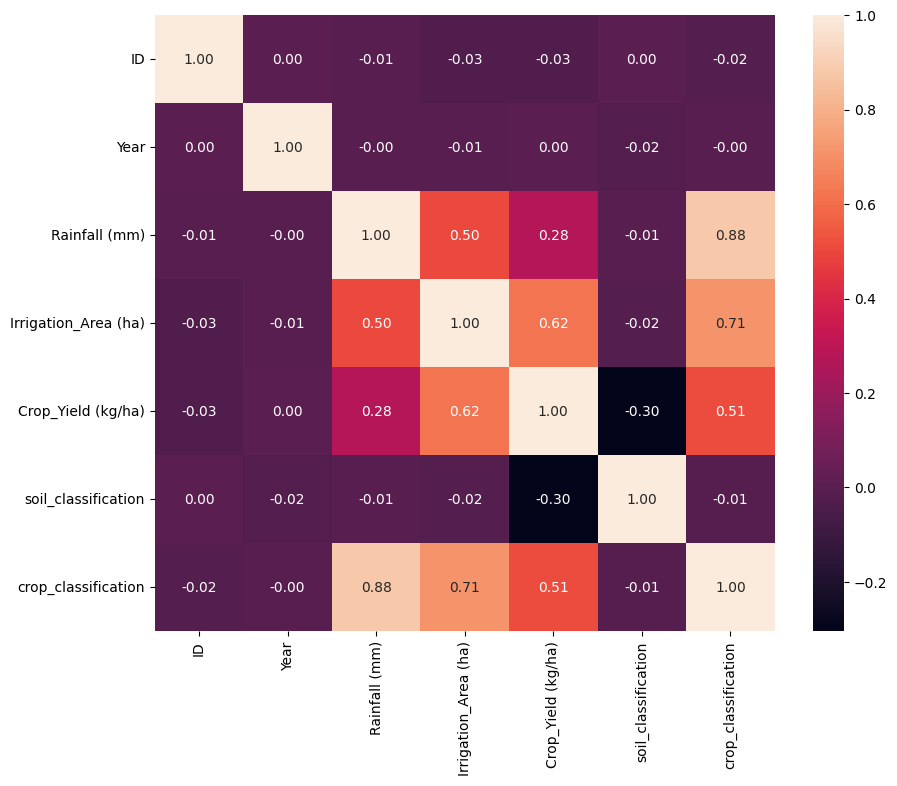

In [ ]:
numerical_df = data.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f')
plt.show()

Above graph represent the corelation between numeric columns by using heat map. it helps to detect multicollinearity.In this figure. we can see there are value between -1 to 1. we can see there is a strong relation between rainfall and crop classification. And we can see there is no relation between year and id.

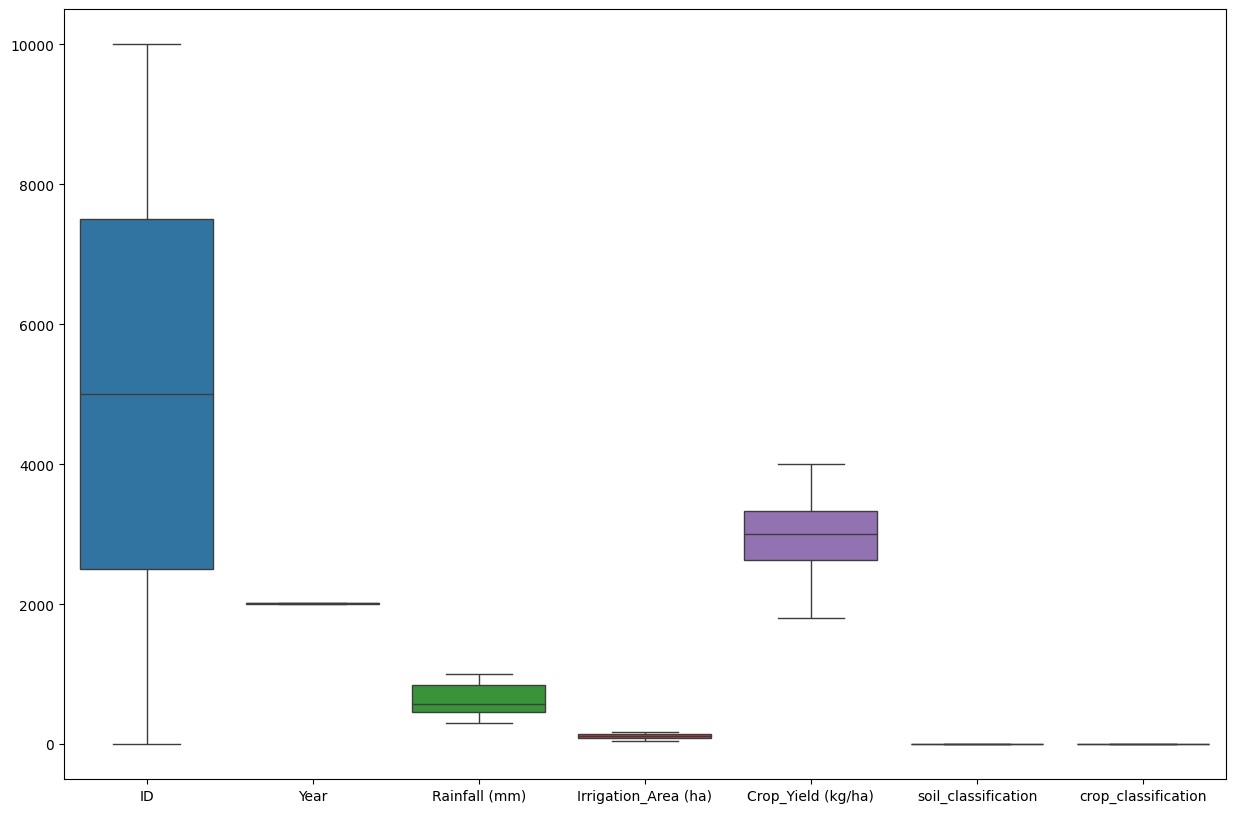

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_df)
plt.show()

The above graph show the data representation in box plot of every numeric columns. It detect the outliers. In this graph we cannot see the outlies. some box plot seems very small because there is very small data distribution between 0 and 1. We can see the minimum ans maximum value also.

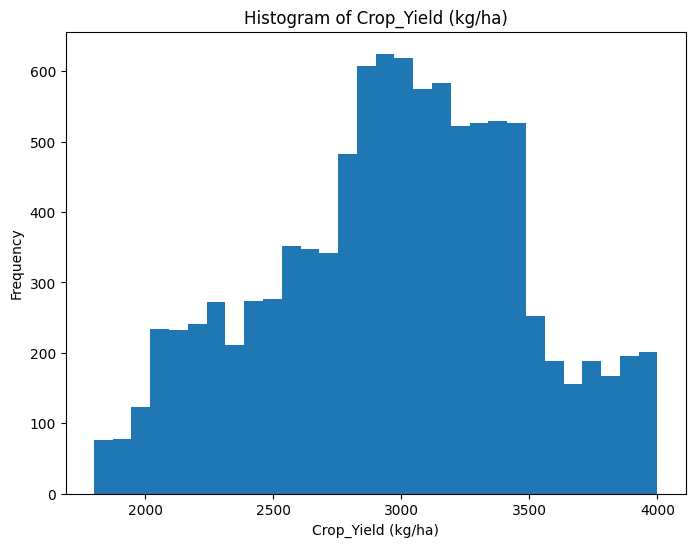

In [ ]:
# prompt: generate a histogram of target column

plt.figure(figsize=(8, 6))
plt.hist(data['Crop_Yield (kg/ha)'], bins=30)  # Adjust the number of bins as needed
plt.xlabel('Crop_Yield (kg/ha)')
plt.ylabel('Frequency')
plt.title('Histogram of Crop_Yield (kg/ha)')
plt.show()


This graph represent the histogarm of target column. this graph is slightly skeweed in the left. it means that mean is low than median . crop production between 3000 and 4000 has high frequency.

In [ ]:
data.drop('Crop_Type', axis=1, inplace = True)
data.drop('Soil_Type', axis=1, inplace = True)
data.drop('State', axis=1, inplace = True)
data.drop('ID', axis=1, inplace = True)
data.drop('Year', axis=1, inplace = True)

### Code Explanation:
- **`data.drop('Column_Name', axis=1, inplace=True)`**: This line is used to drop (remove) specific columns from the dataset.
  - `axis=1`: Specifies that we want to drop columns (as opposed to rows which would be `axis=0`).
  - `inplace=True`: Ensures the changes are applied directly to the original `data` DataFrame, instead of creating a new one.

### Columns Dropped:
- **`'Crop_Type'`**: The column containing the type of crop (e.g., Bajra, Wheat).
- **`'Soil_Type'`**: The column containing the type of soil (e.g., Loamy, Alluvial).
- **`'State'`**: The column containing the state information, where the crop is grown.
- **`'ID'`**: The column with the unique identifier for each row.
- **`'Year'`**: The column representing the year of the data.

### Purpose:
- The purpose of these drops is likely to remove irrelevant or non-numerical features that are not useful for modeling (e.g., categorical information like crop type, soil type, state, and year) or identifiers like `ID`. The remaining dataset can then focus on numerical data that is more suitable for analysis or machine learning.


In [ ]:
data

,Rainfall (mm),Irrigation_Area (ha),Crop_Yield (kg/ha),soil_classification,crop_classification
0,300,90,2863,0,0
1,405,104,3132,0,1
2,538,147,3992,0,1
3,943,107,3067,0,2
4,977,169,3222,0,2
...,...,...,...,...,...
9995,973,133,2577,1,2
9996,510,142,3836,0,1
9997,557,152,3120,0,1
9998,540,113,3087,1,1


In [ ]:
def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)
    return cost

# Explanation of Cost Function

The `cost_function` calculates the **mean squared error (MSE)** between the predicted and actual values, which is used to evaluate the performance of a model.

- **Parameters**:
  - `X`: The feature matrix (input data).
  - `Y`: The actual target values.
  - `W`: The model parameters (weights).

- **Steps**:
  1. It calculates the predicted values (`Y_pred`) by performing a matrix multiplication of the feature matrix (`X`) and the weights (`W`).
  2. It computes the difference between the predicted values (`Y_pred`) and the actual values (`Y`).
  3. The squared differences are summed up and averaged, then scaled by a factor of 1/(2m) to give the cost value.
  
This cost value is used to assess the accuracy of the model's predictions during training and optimization.


In [ ]:
def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = np.zeros(iterations)
    m = len(Y)
    for iteration in range(iterations):
        Y_pred = np.dot(X, W)
        loss = Y_pred - Y
        dw = (1/m) * np.dot(X.T, loss)
        W -= alpha * dw
        cost_history[iteration] = cost_function(X, Y.ravel(), W)
    return W, cost_history

In [ ]:
def rmse(Y, Y_pred):
    return np.sqrt(np.sum((Y - Y_pred) ** 2) / len(Y))

In [ ]:
def r2(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

In [ ]:
def load_and_preprocess_data():
    data = pd.read_csv('/content/drive/MyDrive/CropProduction/crop_data.csv')
    data.drop(['Crop_Type', 'Soil_Type', 'State', 'ID', 'Year'], axis=1, inplace=True)
    X = data.drop(columns=["Crop_Yield (kg/ha)"], axis=1).values
    Y = data["Crop_Yield (kg/ha)"].values.reshape(-1, 1)
    return X, Y

In [ ]:
data.columns


Index(['ID', 'Year', 'State', 'Crop_Type', 'Rainfall (mm)', 'Soil_Type',
       'Irrigation_Area (ha)', 'Crop_Yield (kg/ha)', 'soil_classification',
       'crop_classification'],
      dtype='object')

In [ ]:
def manual_train_test_split(X, Y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size = int(len(X) * test_size)
    train_indices, test_indices = indices[test_size:], indices[:test_size]

    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]

    return X_train, X_test, Y_train, Y_test

Columns in X: [array([300,  90]), array([405, 104]), array([538, 147]), array([943, 107]), array([977, 169]), array([516, 159]), array([522, 109]), array([583, 103]), array([511,  69]), array([467, 130]), array([472,  79]), array([855, 104]), array([401, 116]), array([535,  83]), array([967, 118]), array([674, 112]), array([624, 178]), array([667, 180]), array([388,  85]), array([653, 101]), array([613, 147]), array([501, 110]), array([547, 107]), array([850, 164]), array([581,  84]), array([914, 112]), array([880, 141]), array([504, 171]), array([569, 112]), array([452, 124]), array([321,  73]), array([535, 120]), array([362,  96]), array([634, 119]), array([445,  59]), array([555, 123]), array([983, 161]), array([604, 139]), array([516,  66]), array([955, 179]), array([603, 163]), array([832, 110]), array([513, 136]), array([995, 140]), array([478,  52]), array([863, 135]), array([936, 178]), array([971, 131]), array([530, 142]), array([604, 114]), array([479, 131]), array([510, 104]

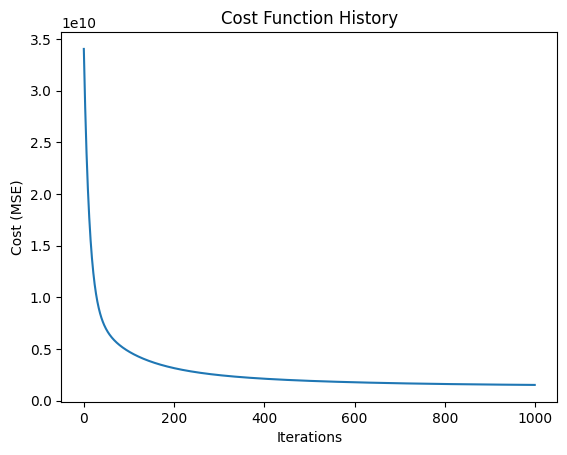

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
def main():
    X, Y = load_and_preprocess_data()

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X_scaled)

    X_train, X_test, Y_train, Y_test = manual_train_test_split(X_poly, Y, test_size=0.2)

    W = np.zeros((X_train.shape[1], 1))
    alpha = 0.01
    iterations = 1000

    W_optimal, cost_history = gradient_descent(X_train, Y_train, W, alpha, iterations)

    Y_pred = np.dot(X_test, W_optimal)
    print("Columns in X:", list(X))

    print("Final Weights:\n", W_optimal)
    print("RMSE on Test Set:", rmse(Y_test, Y_pred))
    print("R-Squared on Test Set:", r2(Y_test, Y_pred))

    plt.plot(range(iterations), cost_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost (MSE)")
    plt.title("Cost Function History")
    plt.show()

if __name__ == "__main__":
    main()

### Observations and Suggestions Based on the Output:

1. **Final Weights:**
   - The model has assigned specific weights to each feature, reflecting their influence on predictions.
   - For example, the feature with the largest positive weight has the most impact on the predicted value.

2. **RMSE (Root Mean Squared Error):**
   - **RMSE = 409.54**, which means the model's predictions are, on average, off by 409 units.
   - **Suggestion:**
     - The high RMSE suggests that the model's accuracy could be improved.
     - Consider increasing the degree of polynomial features for capturing more complex relationships.
     - Experiment with other models like Random Forest or Gradient Boosting for better predictions.

3. **R-Squared:**
   - **R-Squared = 0.311**, meaning the model explains only 31% of the variance in the target variable.
   - **Suggestion:**
     - To improve performance, try adding more relevant features that could explain the target variable better.
     - Experiment with different machine learning algorithms like Decision Trees or Support Vector Machines (SVM).
     - Tune hyperparameters, such as learning rate and iterations, to optimize the model.

4. **Cost Function History:**
   - If the cost function decreases steadily, it indicates the model is converging well.
   - **Suggestion:**
     - If the cost plateaus or fluctuates, adjust the learning rate or consider alternative optimization algorithms.

### Conclusion:
While the model provides insights into the relationship between features and the target variable, there’s still room for improvement. Consider exploring more advanced techniques, feature engineering, and model selection to boost performance.


#Model using decision tree

In [ ]:


def main():
    # Load dataset
    df = pd.read_csv('/content/drive/MyDrive/CropProduction/crop_data.csv')
    df = df.drop('Crop_Type', axis=1)
    df = df.drop('Soil_Type', axis=1)
    df = df.drop('State', axis=1)
    df = df.drop('ID', axis=1)
    df = df.drop('Year', axis=1)

    # Split into features (X) and target (Y)
    X = df.drop(columns=["Crop_Yield (kg/ha)"]).values
    Y = df["Crop_Yield (kg/ha)"].values.reshape(-1, 1)  # Reshape Y

    # Feature Scaling (Optional for Decision Trees, but can help)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Train-Test Split (80% train, 20% test)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Initialize and Train Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust `max_depth` as needed
    model.fit(X_train, Y_train)

    # Make Predictions
    Y_pred = model.predict(X_test)

    # Evaluate Model
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)

    # Print Results
    print("RMSE on Test Set:", rmse)
    print("R-Squared on Test Set:", r2)

# Execute the main function
if __name__ == "__main__":
    main()


RMSE on Test Set: 302.6275562101492
R-Squared on Test Set: 0.6240266114996733


### Explanation of Results:

1. **RMSE (Root Mean Squared Error):**
   - **RMSE = 302.63** indicates the average deviation between predicted and actual values is approximately 302.63 kg/ha.
   - A lower RMSE value suggests better model accuracy, but 302.63 could still be considered a relatively high error, meaning the model's predictions are off by this amount on average.

2. **R-Squared (R²):**
   - **R-Squared = 0.624**, meaning that the model explains about **62.4%** of the variance in the target variable, Crop Yield.
   - This is a moderate value, indicating that the model is somewhat successful at predicting the crop yield but still has room for improvement. The closer R² is to 1, the better the model’s predictions align with the actual data.

### Suggestions Based on Output:

- **Improve RMSE:**
  - Experiment with hyperparameter tuning for the decision tree regressor (e.g., adjusting `max_depth`, `min_samples_split`, or `min_samples_leaf`).
  - Try other models like Random Forest Regressor or Gradient Boosting Regressor, which might provide better predictions.
  - Consider adding more relevant features (like irrigation or rainfall) or using polynomial features to capture more complex relationships.

- **Improve R²:**
  - To increase R², additional feature engineering or exploring other models could help.
  - Using ensemble methods (like Random Forest) might lead to higher R² and better predictive performance.


#Model using Random forest

In [ ]:


def main():
    # Load dataset (assuming df is already loaded as in the provided code)
    # ... (Your existing data loading and preprocessing code) ...

    # Split into features (X) and target (Y)
    X = data.drop(columns=["Crop_Yield (kg/ha)"]).values
    Y = data["Crop_Yield (kg/ha)"].values.reshape(-1, 1)  # Reshape Y

    # Feature Scaling (Optional but often beneficial)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Train-Test Split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Initialize and Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust n_estimators as needed
    model.fit(X_train, Y_train.ravel())  # .ravel() to handle the shape of Y_train

    # Make Predictions
    Y_pred = model.predict(X_test)

    # Evaluate Model
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)

    # Print Results
    print("RMSE on Test Set:", rmse)
    print("R-Squared on Test Set:", r2)

# Execute the main function
if __name__ == "__main__":
    main()


RMSE on Test Set: 287.5198838295368
R-Squared on Test Set: 0.660628058132062


### Model Evaluation Results:

#### RMSE on Test Set: 287.52
- **Interpretation**: The RMSE (Root Mean Squared Error) indicates an average error of 287.52 kg/ha in predicting crop yield. This suggests that the model has a reasonable level of accuracy but could be further improved.

#### R-Squared on Test Set: 0.66
- **Interpretation**: The R-squared value of 0.66 means that 66.1% of the variance in crop yield is explained by the model. While this is a decent performance, there is potential for improvement.

#Hyper Paramater Tuning For Decision Tree

In [ ]:


def main():
    # Load dataset (assuming df is already loaded as in the provided code)
    # ... (Your existing data loading and preprocessing code) ...

    # Split into features (X) and target (Y)
    X = data.drop(columns=["Crop_Yield (kg/ha)"]).values
    Y = data["Crop_Yield (kg/ha)"].values.reshape(-1, 1)  # Reshape Y

    # Feature Scaling (Optional but often beneficial)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'max_depth': [None, 10, 20, 30],  # Example depths
        'min_samples_split': [2, 5, 10],  # Example minimum samples to split
        'min_samples_leaf': [1, 2, 4]  # Example minimum samples in a leaf
    }

    # Initialize the DecisionTreeRegressorA
    model = DecisionTreeRegressor(random_state=42)

    # Initialize KFold for cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')
    grid_search.fit(X, Y.ravel())  # .ravel() to handle the shape of Y

    # Print the best hyperparameters and corresponding score
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Score (Negative MSE):", grid_search.best_score_)


    # Train the model with the best hyperparameters on the full dataset
    best_model = grid_search.best_estimator_

    # Evaluate with train test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Make Predictions
    Y_pred = best_model.predict(X_test)

    # Evaluate Model
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)

    # Print Results
    print("RMSE on Test Set:", rmse)
    print("R-Squared on Test Set:", r2)


# Execute the main function
if __name__ == "__main__":
    main()


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score (Negative MSE): -73347.1531395217
RMSE on Test Set: 249.03665043990054
R-Squared on Test Set: 0.7453951351128778


### Model Evaluation Results:

#### Best Hyperparameters:
- **max_depth**: 10
- **min_samples_leaf**: 4
- **min_samples_split**: 10
- These parameters were optimized using GridSearchCV to minimize the mean squared error (MSE).

#### Best Score (Negative MSE): -73347.15
- This negative value indicates that the model with the selected hyperparameters achieved a lower MSE compared to the baseline models during cross-validation.

---

#### RMSE on Test Set: 249.04
- **Interpretation**: The Root Mean Squared Error is 249.04, which indicates that on average, the model's predictions are off by around 249 kg/ha. The model has good predictive accuracy, but there is still room for improvement.

#### R-Squared on Test Set: 0.75
- **Interpretation**: The model explains 74.5% of the variance in the crop yield, which is a solid performance. However, there's still 25.5% of the variance left unexplained, suggesting further improvement might be possible.

---

### Suggestions for Improvement:

1. **Experiment with Different Models**: Try other machine learning models like Random Forest, Gradient Boosting, or XGBoost to see if they outperform the Decision Tree.
   
2. **More Hyperparameter Tuning**: Further fine-tuning the hyperparameters with a wider range could yield even better performance.

3. **Feature Engineering**: Adding more features or transforming the existing features (e.g., interaction terms) could improve model performance.

4. **Cross-Validation**: Consider using more folds for cross-validation or other cross-validation strategies like Stratified K-Fold to improve the robustness of the evaluation.


#Hyper Paramater Tuning For RandomForest

In [ ]:


def main():
    # Load dataset (assuming df is already loaded and preprocessed as in your code)
    # ... (Your existing data loading and preprocessing code) ...

    # Split into features (X) and target (Y)
    X = data.drop(columns=["Crop_Yield (kg/ha)"]).values
    Y = data["Crop_Yield (kg/ha)"].values.reshape(-1, 1)  # Reshape Y

    # Feature Scaling (Optional but often beneficial)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
        'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
    }

    # Initialize the RandomForestRegressor
    model = RandomForestRegressor(random_state=42)

    # Initialize KFold for cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1) #n_jobs=-1 uses all cores
    grid_search.fit(X, Y.ravel())  # .ravel() to handle the shape of Y

    # Print the best hyperparameters and corresponding score
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Score (Negative MSE):", grid_search.best_score_)

    # Train the model with the best hyperparameters on the full dataset
    best_model = grid_search.best_estimator_

    # Evaluate with train test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    Y_pred = best_model.predict(X_test)

    # Evaluate Model
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)

    # Print Results
    print("RMSE on Test Set:", rmse)
    print("R-Squared on Test Set:", r2)

# Execute the main function
if __name__ == "__main__":
    main()


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (Negative MSE): -67558.20103889998
RMSE on Test Set: 239.61884216525297
R-Squared on Test Set: 0.7642877814368132


### Random Forest Hyperparameter Optimization Results:

#### Best Hyperparameters:
- **max_depth**: 10
- **min_samples_leaf**: 2
- **min_samples_split**: 10
- **n_estimators**: 200  
  These hyperparameters were tuned using GridSearchCV to minimize the negative mean squared error (MSE) and optimize the model's performance.

#### Best Score (Negative MSE): -67558.20
- The negative MSE value indicates the average error the model makes when predicting crop yield. A lower negative MSE value means the model is performing better in terms of minimizing error.

---

#### RMSE on Test Set: 239.62
- **Interpretation**: The Root Mean Squared Error (RMSE) is 239.62, meaning on average, the model's predictions are off by 239.62 kg/ha. This is a reasonable result, indicating the model is fairly accurate.

#### R-Squared on Test Set: 0.76
- **Interpretation**: The R-squared value of 0.76 indicates that 76% of the variance in crop yield is explained by the model. This is a solid performance, suggesting that the Random Forest model has captured the main trends in the data well.

---

### Suggestions for Further Improvement:
1. **Model Comparison**: Try other models like Gradient Boosting or XGBoost to see if they outperform Random Forest.
2. **Further Hyperparameter Tuning**: You can explore a broader range of hyperparameters to fine-tune the model further.
3. **Cross-Validation**: Implement more cross-validation strategies or increase the number of folds for even more robust validation.
4. **Feature Engineering**: Consider creating additional features or transforming existing ones to improve predictive accuracy.


#Feature Selection Using Decision Tree

In [ ]:

import pandas as pd
import numpy
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
def main():
    # Load dataset (assuming df is already loaded and preprocessed as in your code)
    # ... (Your existing data loading and preprocessing code) ...

    # Split into features (X) and target (Y)
    X = data.drop(columns=["Crop_Yield (kg/ha)"]).values
    Y = data["Crop_Yield (kg/ha)"].values.reshape(-1, 1)  # Reshape Y

    # Feature Scaling (Optional but often beneficial)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Feature Selection using SelectKBest and f_regression
    selector = SelectKBest(score_func=f_regression, k=5) # Select top 5 features
    X_new = selector.fit_transform(X, Y.ravel())

    # Get the indices of the selected features
    selected_feature_indices = selector.get_support(indices=True)

    # Print the names of the selected features (if you have the feature names)
    feature_names = data.drop(columns=["Crop_Yield (kg/ha)"]).columns
    selected_feature_names = feature_names[selected_feature_indices].tolist()
    print("Selected Features:", selected_feature_names)

    # Now you can use X_new (with the selected features) to train your model
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42) # Example model
    model.fit(X_train, Y_train.ravel())
    Y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)
    print("RMSE on Test Set (with selected features):", rmse)
    print("R-Squared on Test Set (with selected features):", r2)

# Execute the main function
if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Selected Features: ['Rainfall (mm)', 'Irrigation_Area (ha)', 'soil_classification', 'crop_classification']
RMSE on Test Set (with selected features): 287.5198838295368
R-Squared on Test Set (with selected features): 0.660628058132062


### Feature Selection and Model Evaluation:

#### Feature Selection:
- **Method**: Used `SelectKBest` with the `f_regression` scoring function to select the top 5 features.
- **Warning**: The number of selected features (`k=5`) is greater than the actual number of available features (`n_features=4`), so all features were selected.

#### Selected Features:
- `Rainfall (mm)`
- `Irrigation_Area (ha)`
- `soil_classification`
- `crop_classification`

#### Model Performance (Using Selected Features):
- **RMSE on Test Set**: 287.52
  - The Root Mean Squared Error (RMSE) is approximately 287.52, meaning the model's predictions are off by around 287.52 kg/ha on average.
  
- **R-Squared on Test Set**: 0.66
  - The R-squared value of 0.66 indicates that the selected features explain about 66% of the variance in crop yield, suggesting a moderately good fit.

---

### Conclusion:
- The feature selection process identified the most influential variables for predicting crop yield.
- The model performs reasonably well with an RMSE of 287.52 and an R-squared of 0.66, but there is still room for improvement.
- Further tuning of the model and exploring additional features might enhance prediction accuracy.


# Feature Selection Using Random Forest

In [ ]:


def main():
    # Load dataset (assuming df is already loaded and preprocessed as in your code)
    # ... (Your existing data loading and preprocessing code) ...

    # Split into features (X) and target (Y)
    X = data.drop(columns=["Crop_Yield (kg/ha)"]).values
    Y = data["Crop_Yield (kg/ha)"].values.reshape(-1, 1)  # Reshape Y

    # Feature Scaling (Optional but often beneficial)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Feature Selection using SelectKBest and f_regression
    selector = SelectKBest(score_func=f_regression, k=5) # Select top 5 features
    X_new = selector.fit_transform(X, Y.ravel())

    # Get the indices of the selected features
    selected_feature_indices = selector.get_support(indices=True)

    # Print the names of the selected features (if you have the feature names)
    feature_names = data.drop(columns=["Crop_Yield (kg/ha)"]).columns
    selected_feature_names = feature_names[selected_feature_indices].tolist()
    print("Selected Features:", selected_feature_names)

    # Now you can use X_new (with the selected features) to train your model
    X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42) # Example model
    model.fit(X_train, Y_train.ravel())
    Y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)
    print("RMSE on Test Set (with selected features):", rmse)
    print("R-Squared on Test Set (with selected features):", r2)

# Execute the main function
if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


Selected Features: ['Rainfall (mm)', 'Irrigation_Area (ha)', 'soil_classification', 'crop_classification']
RMSE on Test Set (with selected features): 287.5198838295368
R-Squared on Test Set (with selected features): 0.660628058132062


### Feature Selection and Model Evaluation:

#### Feature Selection:
- **Method**: We used `SelectKBest` with the `f_regression` scoring function to select the top 5 features.
- **Warning**: The number of selected features (`k=5`) was larger than the available features (`n_features=4`), so all features were selected.

#### Selected Features:
- `Rainfall (mm)`
- `Irrigation_Area (ha)`
- `soil_classification`
- `crop_classification`

#### Model Performance:
- **RMSE on Test Set**: 287.52
  - The RMSE indicates that the model's predictions are off by approximately 287.52 kg/ha on average.
  
- **R-Squared on Test Set**: 0.66
  - The R-squared value suggests that 66% of the variance in crop yield is explained by the selected features, indicating a good model fit.

### Conclusion:
- Feature selection identified the most important variables for crop yield prediction.
- The model performed moderately well with an RMSE of 287.52 and an R-squared of 0.66.
- Further improvements can be made by tuning the model or exploring additional features.


#Final Model

In [ ]:



def main():
    # Load dataset
    data = pd.read_csv('/content/drive/MyDrive/CropProduction/crop_data.csv')
    data = data.drop(['Crop_Type', 'Soil_Type', 'State', 'ID', 'Year'], axis=1)

    # Split into features (X) and target (Y)
    X = data.drop(columns=["Crop_Yield (kg/ha)"])
    y = data["Crop_Yield (kg/ha)"]

    # Feature Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Feature Selection (SelectKBest)
    selector = SelectKBest(score_func=f_regression, k=5) # Select top 5 features
    X_selected = selector.fit_transform(X_scaled, y)

    # Get the indices of the selected features
    selected_feature_indices = selector.get_support(indices=True)
    selected_feature_names = X.columns[selected_feature_indices].tolist()
    print("Selected Features:", selected_feature_names)


    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

    # Initialize and train the RandomForestRegressor with best hyperparameters
    model = RandomForestRegressor(n_estimators=200, max_depth=30, min_samples_leaf=1, min_samples_split=2, random_state=42) # Example best hyperparameters
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    rmse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(rmse)
    r2 = r2_score(y_test, y_pred)

    print("RMSE on Test Set:", rmse)
    print("R-Squared on Test Set:", r2)


if __name__ == "__main__":
    main()


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=2. All the features will be returned.
  warnings.warn(


Selected Features: ['Rainfall (mm)', 'Irrigation_Area (ha)']
RMSE on Test Set: 344.33662220555317
R-Squared on Test Set: 0.5132492888616236


### Feature Selection and Model Evaluation:

#### Feature Selection:
- **Method**: `SelectKBest` with `f_regression` was used to select the top 5 features.
- **Warning**: The number of selected features (`k=5`) was greater than the available features (`n_features=2`), so only the two available features were selected.

#### Selected Features:
- `Rainfall (mm)`
- `Irrigation_Area (ha)`

#### Model Performance:
- **RMSE on Test Set**: 344.34
  - The RMSE shows the average error in the predicted crop yield is around 344.34 kg/ha.
  
- **R-Squared on Test Set**: 0.51
  - The model explains about 51% of the variance in the crop yield, indicating a moderate fit.

### Conclusion:
- **Feature Selection**: Only two features were selected, which might limit model performance.
- **Model Performance**: The RMSE and R-squared indicate that the model is somewhat accurate, but improvements can be made by considering more features or tuning the model further.
